## Differential-flow reactor model equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import optimize

In [3]:
# np.seterr('raise')

In [4]:
def print_ab(a,b, fig_size = (10,3)):
    fig, ax = plt.subplots(1, 2, figsize = fig_size)
    im = ax[0].pcolormesh(a) #, cmap="YlGn"
    cbar = ax[0].figure.colorbar(im, ax=ax[0])
    ax[0].set_title('a')
    im = ax[1].pcolormesh(b) #, cmap="YlGn"
    cbar = ax[1].figure.colorbar(im, ax=ax[1])
    ax[1].set_title('b')
    plt.show()

<table>
    <tr> <td> <img src='DFRM_equations.png'> </td>
         <td> <img src='Functions.png' width=320, heigth=240> </td>
         <td> <img src='Functions_xt.png' > </td>
    </tr>
</table>

In [28]:
ht = 0.1 # time step
hx = 0.1 # x step
Tx = int(600 / hx) # terminate x
Tt = int(50 / ht) # terminate t
# Parameters
mu = 1.01
phi = 0.4
delta_b = 1e-3 # initial small perturbation being given to b

In [29]:
a = np.zeros((Tt, Tx))
b = np.zeros((Tt, Tx))
print(a.shape, b.shape)

(500, 6000) (500, 6000)


In [30]:
a[0] = 1./mu
b[0] = mu
b[0][0] = mu+delta_b

In [31]:
b[0,:5], 'hh', b[0,-5:]

(array([1.011, 1.01 , 1.01 , 1.01 , 1.01 ]),
 'hh',
 array([1.01, 1.01, 1.01, 1.01, 1.01]))

In [32]:
def func (x, a_k, b_k): # x = [a_{0},...,a_{Tx-1}, b_{0}, ..., b_{Tx-1}] - k+1 step
                        # a_k = [a_{0},...,a_{Tx-1}] - k step;  b_k = [b_{0},...,b_{Tx-1}] - k step;
    f = np.zeros_like(x)
    a = x[:Tx]
    b = x[Tx:]
#     print(a.shape, b.shape, x.shape)
    for i in range (0, Tx):
        f[i] = a[i] -  a_k[i] - ht * (mu - a[i] * b[i]**2) 
        if i <= Tx-1-2:
            u = (b[i+1] - b[i])/hx   
            dudx = (b[i+2] - 2.* b[i+1] + b[i])/hx**2  
            f[i+Tx] = b[i] - b_k[i] - ht * ( dudx - phi * u + a[i] * b[i]**2 - b[i]) 
        if i >= Tx-1-2 and i <=Tx-1-1:
            f[i+Tx] = b[i+1] - b[i] 
#     print(a.shape, b.shape, x.shape)
    return f
# f = func(x_guess,a[0], b[0] )
# f

In [33]:
x_guess = np.ones(a[0].shape[0]+b[0].shape[0]) # ones # zeros np.concatenate((a[0], b[0])) # 
x_guess.shape, x_guess[Tx]

((12000,), 1.0)

In [34]:
total_deficiency = np.zeros(a[0].shape[0]+b[0].shape[0])

In [ ]:
%%time
for k in range(Tt-1):
    print(f'{k}', end = ' ')
#     x_guess = np.concatenate((a[k], b[k]))
    root = optimize.root(func, x_guess, args=(a[k], b[k])) # fsolve root
    total_deficiency[k] = np.linalg.norm( np.zeros_like(x_guess) - func(root.x,a[k], b[k]) ) #невязка
    print(f'{k}*', end = ' ')
    a[k+1] = root.x[:Tx]
    b[k+1] = root.x[Tx:] 

0 0* 1 1* 2 2* 3 

In [ ]:
import winsound
freq = 500 # Set frequency To 2500 Hertz
dur = 100 # Set duration To 1000 ms == 1 second
winsound.Beep(freq, dur)


In [ ]:
# sol = optimize.root(func, x_guess )#, method='hybr')
# sol.x

In [ ]:
print_ab(a[:50],b[:50])

In [ ]:
fig, ax = plt.subplots()
ax.plot(total_deficiency[:49])

In [23]:
b[0]

array([1.011, 1.01 , 1.01 , ..., 1.01 , 1.01 , 1.01 ])

IndexError: index 100 is out of bounds for axis 1 with size 50

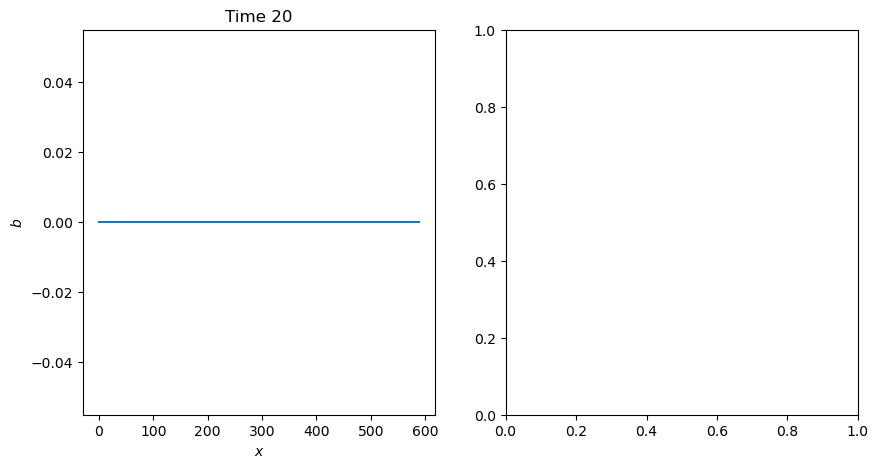

In [419]:
i= 20
lim_x = 10
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(b.T[lim_x:,i])
plt.title(f'Time {i}')
plt.xlabel(r'$x$')
plt.ylabel(r'$b$')
i=100
plt.subplot(1, 2, 2)
plt.plot(b.T[lim_x:,i])
plt.title(f'Time {i}')
plt.xlabel(r'$x$')
plt.show()

In [ ]:
sns.heatmap(b[:60, 500:], annot = False, fmt = '.1e', square=False )

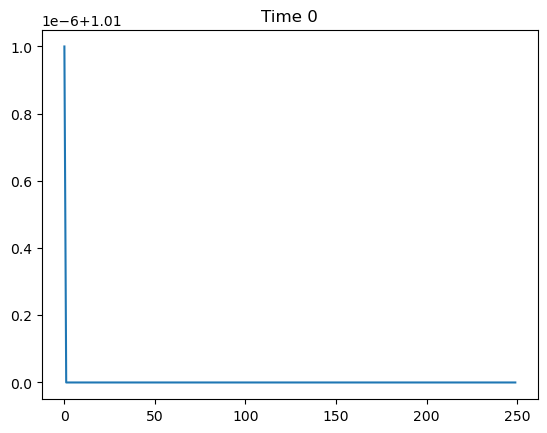

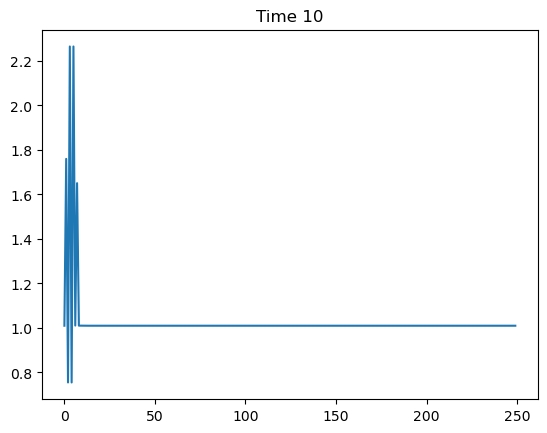

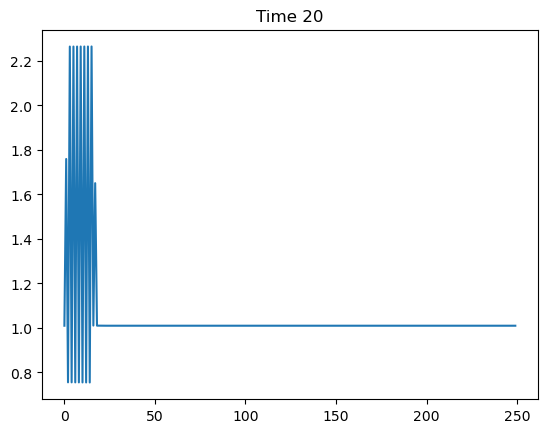

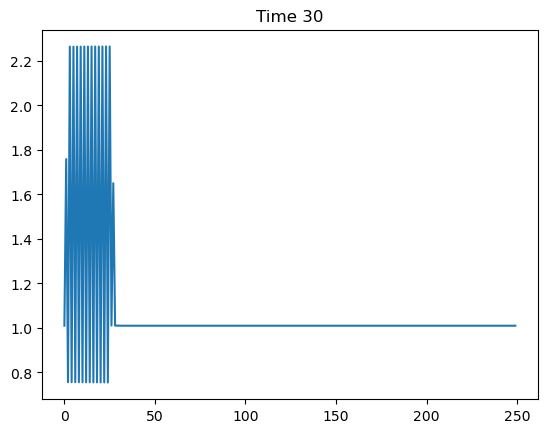

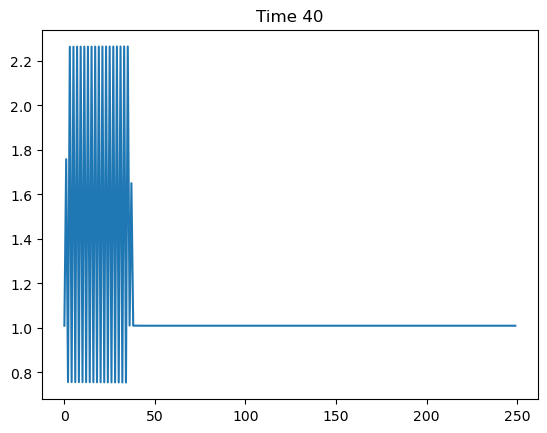

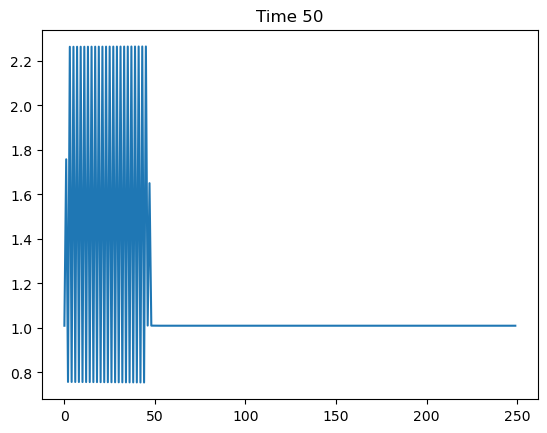

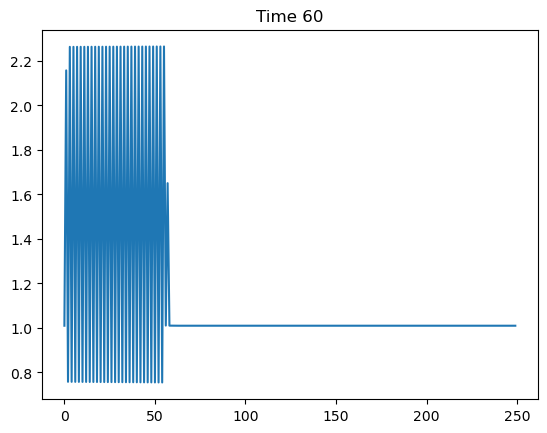

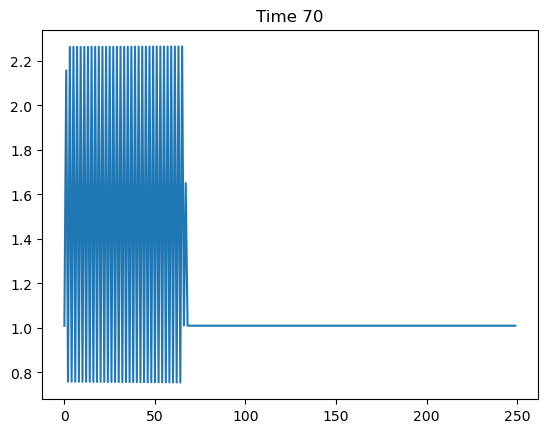

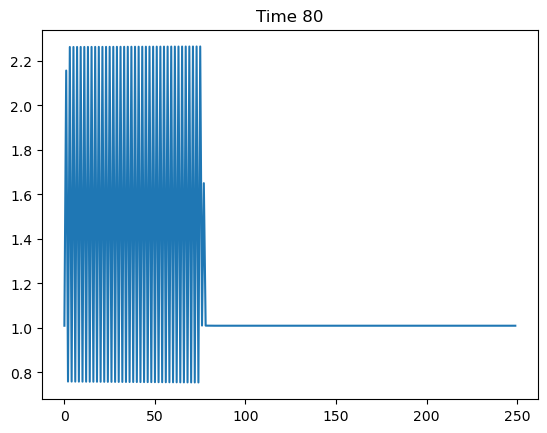

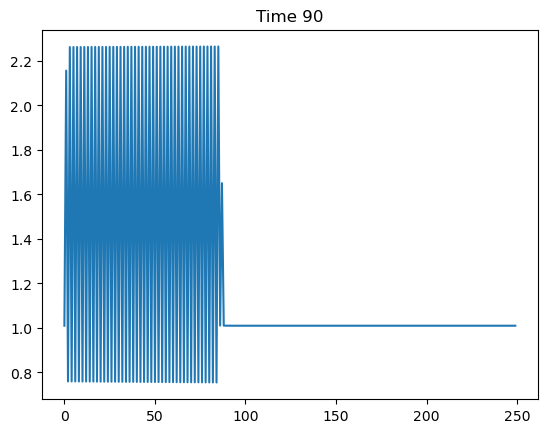

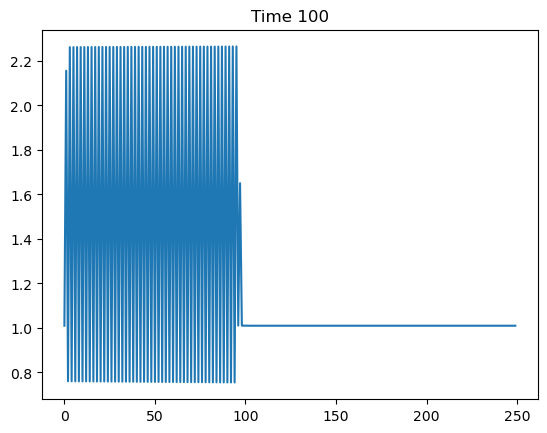

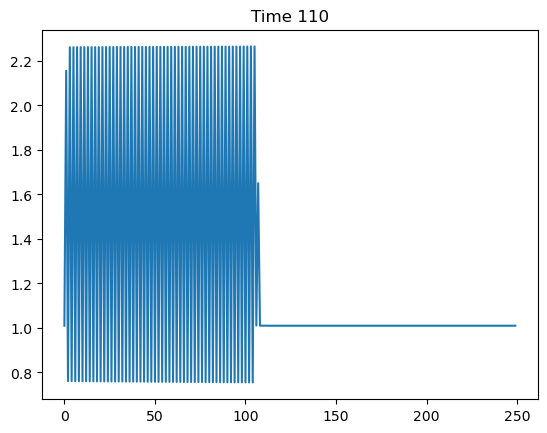

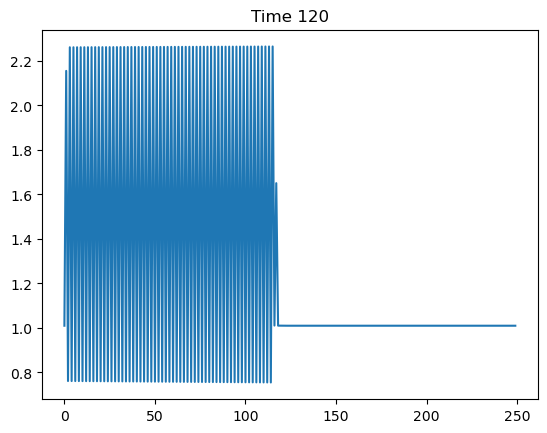

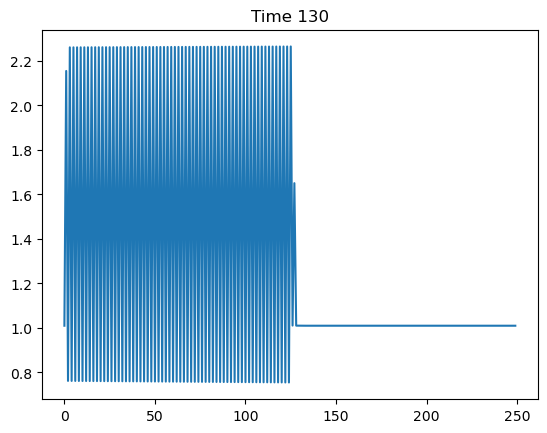

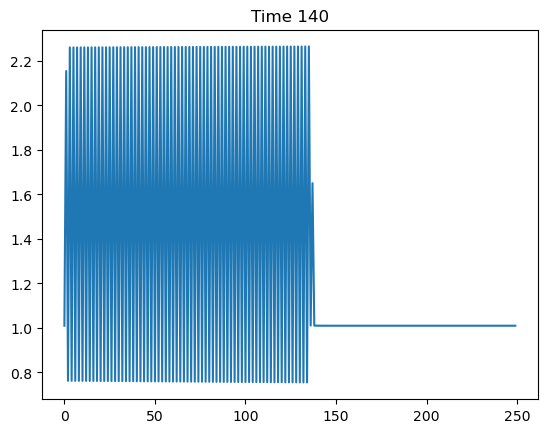

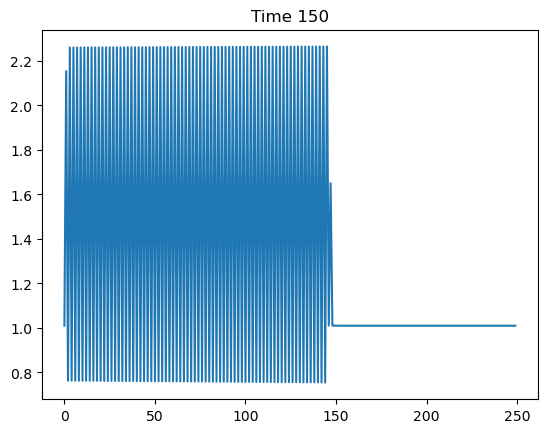

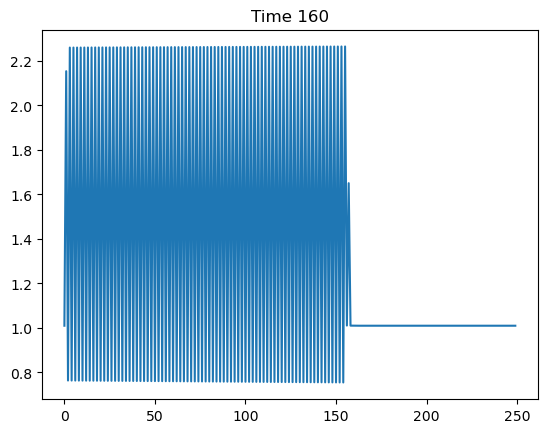

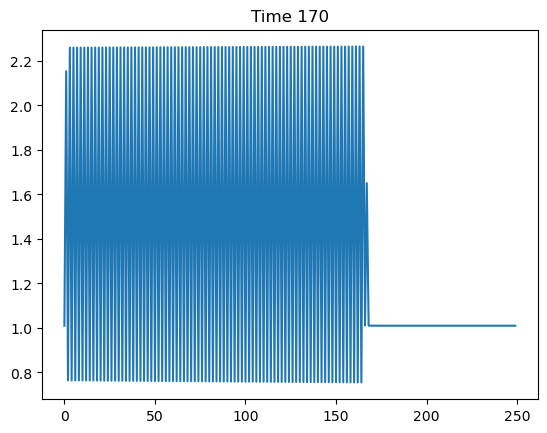

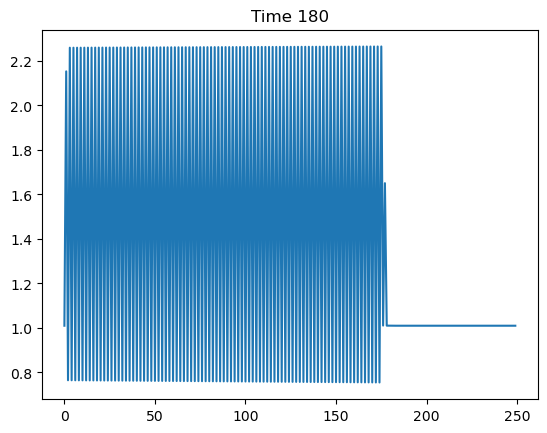

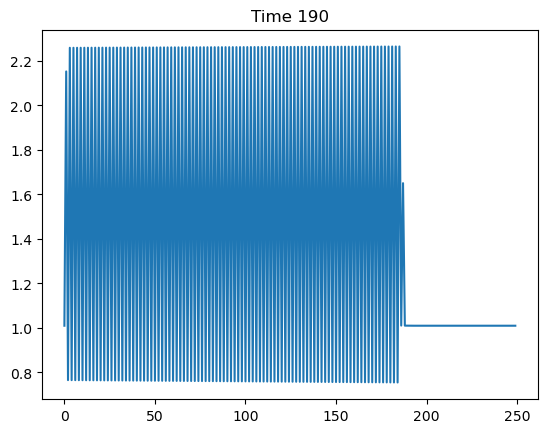

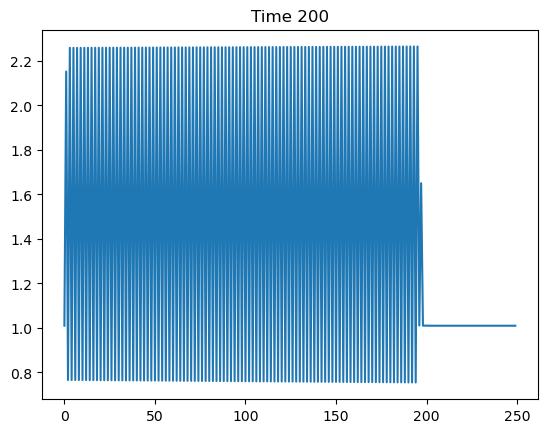

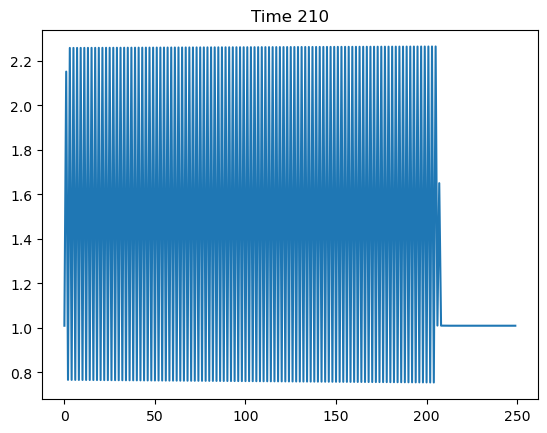

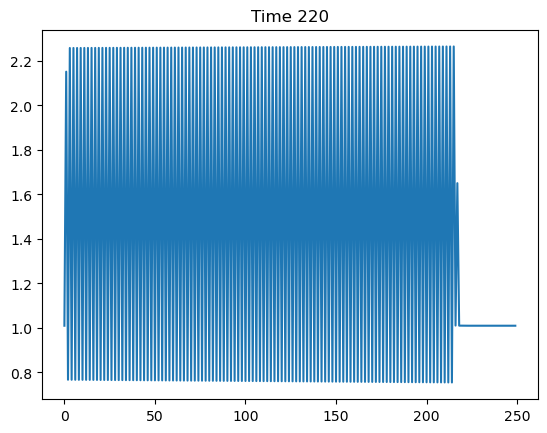

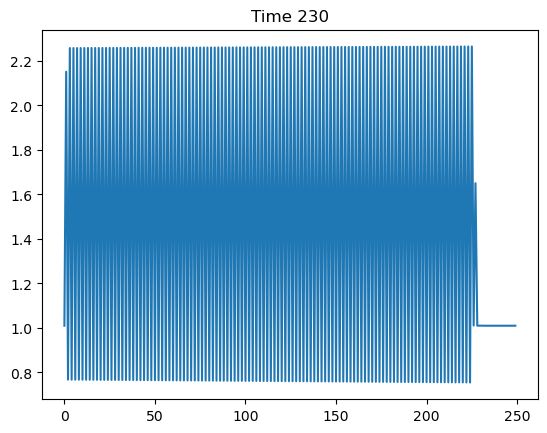

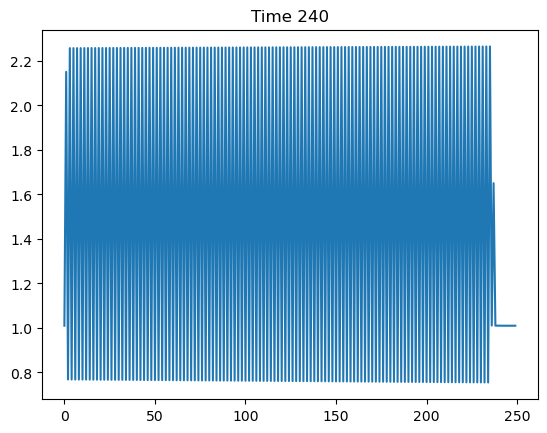

In [499]:
for i in range(25):
    plt.plot(b.T[:250,i*10])
    plt.title(f'Time {i*10}')
    plt.show()

In [92]:
b.T[:,0]

array([1.010001, 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01    ,
       1.01    , 1.01    , 1.01    , 1.01    , 1.01    , 1.01 

In [5]:
ht = 0.5 # time step
hx = 0.5 # x step
Tx = int(600 / hx) # terminate x
Tt = int(50 / ht) # terminate t
# Parameters
mu = 1.01
phi = 0.4
delta_b = 1e-3 # initial small perturbation being given to b

In [6]:
a = np.zeros((Tt, Tx))
b = np.zeros((Tt, Tx))
print(a.shape, b.shape)

(100, 1200) (100, 1200)


In [7]:
a[0] = 1./mu
b[0] = mu
b[0][0] = mu+delta_b

In [8]:
b[0,:5], 'hh', b[0,-5:]

(array([1.011, 1.01 , 1.01 , 1.01 , 1.01 ]),
 'hh',
 array([1.01, 1.01, 1.01, 1.01, 1.01]))

In [82]:
# явная схема
for k in range(Tt-1):
#     a[k+1][0] = a[k][0]
#     b[k+1][0] = b[k][0]
#     a[k+1][-1] = a[k][-1]
#     b[k+1][-1] = b[k][-1]
    for i in range(0, Tx):        
        a[k+1][i] = a[k][i] + ht * (mu - a[k][i] * b[k][i]**2)
        if i <= Tx-1-2:
#             print(f'if i {i}')
            u = (b[k][i+1] - b[k][i])/hx
            dudx = (b[k][i+2] - 2.* b[k][i+1] + b[k][i])/hx**2
            if np.abs(u) > 100000:
                u = 10 * np.sign(u)
            if np.abs(dudx) > 100000:
                dudx = 10 * np.sign(dudx)
            b[k+1][i] = b[k][i] + ht * ( dudx - phi * u + a[k][i] * b[k][i]**2 - b[k][i])
        if i >= Tx-1-2 and i <=Tx-1-1:
#             print(f'else {i}')
            b[k+1][i+1]=b[k+1][i]
#         print((b[k][i] - b[k][i-1])/hx, end=' ')
#     for i in range(0, Tx):
#         if np.abs(a[k+1][i]) > 1000:
#             a[k+1][i] = 1000 * np.sign(a[k+1][i])
#         if np.abs(b[k+1][i]) > 1000:
#             b[k+1][i] = 1000 * np.sign(b[k+1][i])

In [ ]:
print_ab(a[:50],b[:50])